# Main Aim Question 2

## Are there any firm-level factors that affect the total compensation of directors?

In [1]:
# Setup

# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
from IPython.display import HTML
import seaborn as sns
import scipy.stats as stats

# Set any preferences you want for the notebook
warnings.filterwarnings('ignore')

# Set the home directory to the main repository page
os.chdir('..')
os.listdir()

# Read in the dataset
df = pd.read_csv('data/data.csv')

# Create a column called 'company' which identifies where a company belongs to
df['company'] = 1
company_number = 1
for i in range(1, len(df['company'])):
    if df['Stock return'][i] == df['Stock return'][i-1]:
        df['company'][i] = company_number
    else:
        company_number = company_number + 1
        df['company'][i] = company_number

# Create a company level dataframe
df_cmp = df[['company', 'Log(sales)', 'Stock return', 'Volatility', 'Board size', 'Fraction of female', 'Fraction of independent']].drop_duplicates(ignore_index = True)

In [2]:
# Pivot table of average compensation by firm

df_firm_comp = pd.DataFrame(pd.pivot_table(df, values = "Compensation", index = "company", aggfunc = "mean")).reset_index()
df_firm_comp[['Compensation']].describe()

,Compensation
count,200.000000
mean,528.780078
std,137.793720
min,238.761135
25%,431.774180
50%,530.122507
75%,617.909967
max,978.153801


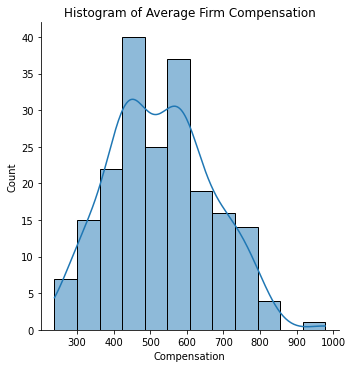

In [3]:
# Histograms of Average Compensation by Firm

sns.displot(df_firm_comp, x="Compensation", kde = True).set(title = "Histogram of Average Firm Compensation")

<AxesSubplot:>

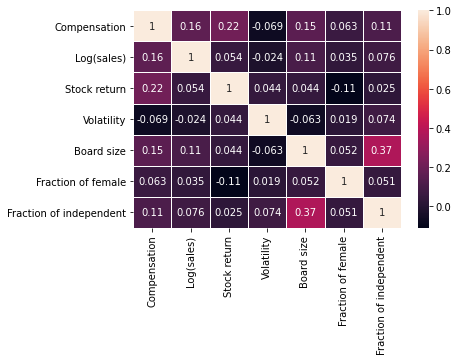

In [4]:
# Correlation of firm level factors against correlation at the director level

sns.heatmap(df[['Compensation', 'Log(sales)', 'Stock return', 'Volatility', 'Board size', 'Fraction of female', 'Fraction of independent']].corr(), annot=True, linewidth=.5)

<AxesSubplot:>

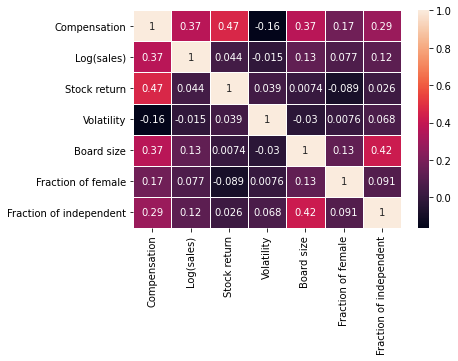

In [5]:
# Correlation of firm level factors against correlation at the company level

df_cmp = df_cmp.merge(df_firm_comp, how = "inner", on = "company")
df_cmp = df_cmp[['Compensation', 'Log(sales)', 'Stock return', 'Volatility', 'Board size', 'Fraction of female', 'Fraction of independent']]
sns.heatmap(df_cmp.corr(), annot=True, linewidth=.5)

#### Conclusion

From the data above we can see that firms do have varying levels of compensation with the mean Average Compensation across all the firms being `$528,780`. This has a high degree of variance however, with the difference between the minimum Average Compensation and maximum Average Compensation being `$978,154 - $238,761 = $739,393`.

Inpsecting the correlation matrices at both the director and firm level, we can see that Stock Return has the highest absolute and positive relationship with Compensation being `0.22` at the director level and `0.47` at the firm level. This aligns with our intuition as we believe the companies which are more financially successful will have more capital to pay the employees and directors of the companies.

The only variable which has a negative correlation with Compensation is Stock Return, which has a negative correlation at both the director `-0.069` and company `-0.16` level.

From this analysis, we however cannot conclude that any firm-level factors have more than a statistical association with director compensation and would need to do further analysis to identify or dispel causal relationships.